In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import numpy as np

# Carregar o dataset
data = load_breast_cancer()
X = data.data  # Características
y = data.target  # Rótulos (0 ou 1)

# Dividir o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Adicionar uma coluna de 1s para o termo de bias (intercept)
X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

print("Formato de X_train:", X_train.shape)
print("Formato de y_train:", y_train.shape)

Formato de X_train: (455, 31)
Formato de y_train: (455,)


Ou seja, temos 31 informações para cada amostra

In [20]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def GD(X, y, w, alpha, num_iters = 1000):
    N = len(y)
    for _ in range(num_iters):
        # X.dot(w) vai retornar um vetor onde cada valor é w.T.dot(X[i]);
        # y - esse vetor vai representar o vetor erro, no qual cada i-ésimo valor de 1 a N é o erro para amostra i
        # ESSA PARTE DO NP.DOT EXTERNO EU NÃO ENTENDI
        w += alpha * (1 / N) * np.dot( X.T, y - sigmoid(X.dot(w)) )
    return w

def GD2(X, y, w, alpha, num_iters):
    N = len(y)  
    for _ in range(num_iters):
        gradient = np.zeros_like(w) # o gradiente é um vetor do tamanho do vetor de pesos

        for i in range(N):
            error_i = y[i] - sigmoid(np.dot(w, X[i])) 
            gradient += error_i * X[i] 
            # asterisco multiplica cada elemento de um vetor com o respectivo de outro vetor (em ordem)
            # gradient = [error_i * Xi[1], error_i * Xi[2], ..., error_i * Xi[D]]

        w += alpha * (1 / N) * gradient

    return w

w = np.zeros(X_train.shape[1])
alpha = 0.01
num_iters = 1000

theta  = GD(X_train, y_train, w, alpha, num_iters)
theta2 = GD2(X_train, y_train, w, alpha, num_iters)

print("Parâmetros finais (theta):",  theta)
print("Parâmetros finais (theta2):", theta2)

C:\Users\danys\AppData\Local\Temp\ipykernel_12648\1426480214.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Parâmetros finais (theta): [ 4.54128011e-01  3.43661199e+00  1.97182059e+00  1.87050641e+01
  4.28122849e+00  2.28499157e-02 -5.24155871e-02 -1.14175776e-01
 -4.58061737e-02  4.33981110e-02  2.09675484e-02 -4.55157746e-04
  1.64043533e-01 -3.43019950e-01 -1.02682653e+01  2.34461459e-04
 -1.45640295e-02 -2.16321829e-02 -4.29297975e-03  1.50529971e-03
 -4.94895626e-04  3.68131186e+00  1.85292296e+00  1.80934537e+01
 -7.51588569e+00  2.23040012e-02 -1.93294780e-01 -2.89313736e-01
 -6.88360311e-02  3.37556817e-02  9.72950629e-03]
Parâmetros finais (theta2): [ 4.54128011e-01  3.43661199e+00  1.97182059e+00  1.87050641e+01
  4.28122849e+00  2.28499157e-02 -5.24155871e-02 -1.14175776e-01
 -4.58061737e-02  4.33981110e-02  2.09675484e-02 -4.55157746e-04
  1.64043533e-01 -3.43019950e-01 -1.02682653e+01  2.34461459e-04
 -1.45640295e-02 -2.16321829e-02 -4.29297975e-03  1.50529971e-03
 -4.94895626e-04  3.68131186e+00  1.85292296e+00  1.80934537e+01
 -7.51588569e+00  2.23040012e-02 -1.93294780e-01 -

In [21]:
def predict(X, theta):
    return (sigmoid(X.dot(theta)) >= 0.5).astype(int)

y_pred = predict(X_test, theta)
accuracy = np.mean(y_pred == y_test)
print("Acurácia no conjunto de teste usando GD:", accuracy)

y_pred = predict(X_test, theta2)
accuracy = np.mean(y_pred == y_test)
print("Acurácia no conjunto de teste usando GD:", accuracy)

Acurácia no conjunto de teste usando GD: 0.956140350877193
Acurácia no conjunto de teste usando GD: 0.956140350877193


C:\Users\danys\AppData\Local\Temp\ipykernel_12648\1426480214.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


C:\Users\danys\AppData\Local\Temp\ipykernel_12648\1426480214.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


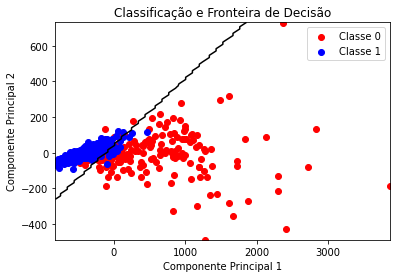

In [24]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_train[:, 1:])

def plot_classification(X_reduced, y, w, pca):
    
    x1_min, x1_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
    x2_min, x2_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 100), np.linspace(x2_min, x2_max, 100))
    
    grid_original = pca.inverse_transform(np.c_[xx1.ravel(), xx2.ravel()])
    grid_original = np.hstack((np.ones((grid_original.shape[0], 1)), grid_original))  
    
    z = grid_original.dot(w)
    h = sigmoid(z)
    h = h.reshape(xx1.shape)
    
    plt.contour(xx1, xx2, h, levels=[0.5], colors='black')
    
    plt.scatter(X_reduced[y == 0, 0], X_reduced[y == 0, 1], color='red', label='Classe 0')
    plt.scatter(X_reduced[y == 1, 0], X_reduced[y == 1, 1], color='blue', label='Classe 1')

    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.title('Classificação e Fronteira de Decisão')
    plt.legend()
    plt.show()


plot_classification(X_reduced, y_train, w, pca)